In [1]:
import pickle
import numpy as np
import matplotlib.pylab as plt
from scipy.linalg import circulant
from scipy.linalg import toeplitz, hankel
from IPython.display import clear_output
from IPython.display import display, HTML
from scipy.linalg import expm

Gamma=0.5
Lambda=0.5
beta=0.40824
mu=0
with open(r"Fourier_plus.pkl", "rb") as f:
    F_plus = pickle.load(f)

with open(r"Fourier_minous.pkl", "rb") as f:
    F_minous = pickle.load(f)
N_size=len(F_plus)


def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))



def Fermi_dirac(n,beta=beta,mu=mu,Gamma=Gamma,Lambda=Lambda,N=N_size):
    # beta is the inverse thermic energy associated in the system (beta)
    # mu corresponds to the chemical potential
    # n is the position of the particle
    # f=np.exp(T*(Omega(Gamma,Lambda,2.0*(np.pi/N)*n)-mu)) +1
    # N corresponds to the size of the system
    f=np.exp(beta*(Omega(Gamma,Lambda,((2.*np.pi)/float(N)) * n)-mu)) +1
    return 1/f


def Toeplitz_matrix(Fourier_plus,L):
    First_column=np.roll(Fourier_plus,-1)[::-1][:L]
    First_row = Fourier_plus[:L]
    return toeplitz(First_column,First_row)
def Hankel_matrix(Fourier_minous,L):
    First_column=Fourier_minous[::-1][:L]
    Last_row=np.roll(Fourier_minous,L-1)[::-1][:L]
    return hankel(First_column,Last_row)


def Covariance_matrix(L,Gamma=Gamma,Lambda=Lambda,beta=0.40824,mu=0,N_size=N_size,Ground=False):
    if Ground:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=True)
    else:
        Fourier_plus,Fourier_minous=Get_Bands_Matrix(Gamma=Gamma,Lambda=Lambda,N_size=N_size,beta=beta,mu=mu,Ground=False)
    return (Toeplitz_matrix(Fourier_plus,L)+Hankel_matrix(Fourier_minous,L))/N_size

def Covariance_matrix_from_sub_sample(Fourier_plus,Fourier_minous,L,N_size=N_size):
    return (Toeplitz_matrix(F_plus,L)+Hankel_matrix(F_minous,L))/N_size


display(HTML("""
<style>
.output {
    display: flex;
    align-items: left;
    text-align: center;
}
</style>
"""))



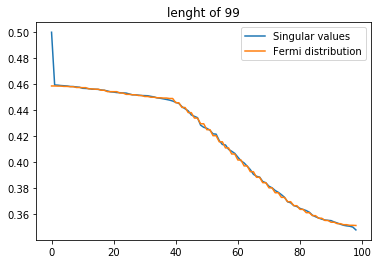

In [2]:
for L in range(7,101,2):
    clear_output(wait=True)
    New_cov_matrix=Covariance_matrix_from_sub_sample(F_plus,F_minous,L)
    S=np.linalg.svd(New_cov_matrix,compute_uv=False)
    n=np.arange(-(L-1)/2,(L-1)/2 +1)
    array_to_plot=sorted(-S+0.5,reverse=True)
    plt.plot(array_to_plot,label="Singular values")
    plt.plot(np.array(sorted(Fermi_dirac(n,N=L),reverse=True)),label="Fermi distribution")
    plt.legend()
    plt.title("lenght of {}".format(L))
    plt.show()

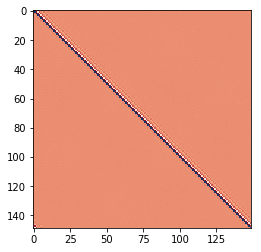

In [4]:
for L in range(3,151,2):
    clear_output(wait=True)
    New_cov_matrix=Covariance_matrix_from_sub_sample(F_plus,F_minous,L)
    O_1,S,O_2=np.linalg.svd(New_cov_matrix)
    S=-S+0.5
    x=sorted(np.log((1-S)/(S)))
    plt.imshow(expm((O_1@np.diag(x)@O_2)).real,cmap="RdBu")
    #plt.colorbar()
    plt.show()

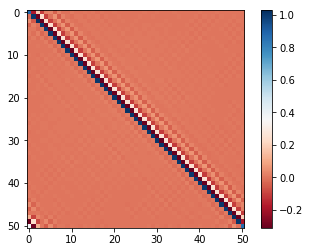

In [5]:
L=51
New_cov_matrix=Covariance_matrix_from_sub_sample(F_plus,F_minous,L)
O_1,S,O_2=np.linalg.svd(New_cov_matrix)
S=-S+0.5
x=sorted(np.log((1-S)/(S)))
plt.imshow(expm((O_1@np.diag(x)@O_2)).real,cmap="RdBu")
plt.colorbar()
plt.show()

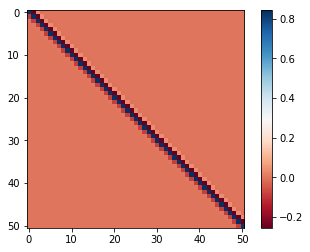

In [6]:
L=51
New_cov_matrix=Covariance_matrix_from_sub_sample(F_plus,F_minous,L)
O_1,S,O_2=np.linalg.svd(New_cov_matrix)
S=-S+0.5
x=(np.log((1-S)/(S)))
plt.imshow(expm((O_1@np.diag(x)@O_2)).real,cmap="RdBu")
plt.colorbar()
plt.show()